# Detecção de outliers

## Gerar dataset

1000 empresas ficticias geradas randomicamente com valuations entre 10M e 100M

In [197]:
# generate a list of 1000 companies with names randomly generated from a list of words and random valuations beteween 10M and 100M on a normal distribution
# with 10 outliers with valuations above 1B and bellow 1M save the list to a csv file (commented out)

import random
import csv

companies = []
words = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape", "honeydew", "kiwi", "lemon", "mango", "nectarine", "orange", "pear", "quince", "raspberry", "strawberry", "tangerine", "ugli", "watermelon"]

for i in range(1000):
    name = random.choice(words) + " " + random.choice(words)
    valuation = random.gauss(55, 15)
    companies.append([name, valuation])

# for i in range(1000):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(100, 200)
#     companies.append([name, valuation])

# for i in range(10):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(1, 100)
#     companies.append([name, valuation])

# for i in range(10):
#     name = random.choice(words) + " " + random.choice(words)
#     valuation = random.randint(200, 300)
#     companies.append([name, valuation])

## Salvar dataset

In [198]:
# save the list to a csv file
with open("companies.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["name", "valuation"])
    writer.writerows(companies)

## Carregar dataset

In [199]:
# load the list from the csv file into a dataframe
import pandas as pd	
df = pd.read_csv("companies.csv")
df.head()

,name,valuation
0,tangerine ugli,76.056950
1,mango banana,52.449604
2,fig lemon,22.906216
3,kiwi mango,46.459580
4,watermelon elderberry,46.096074


## Distribuição normal

O numero de empresas é o eixo y, o valor das empresas é o eixo x

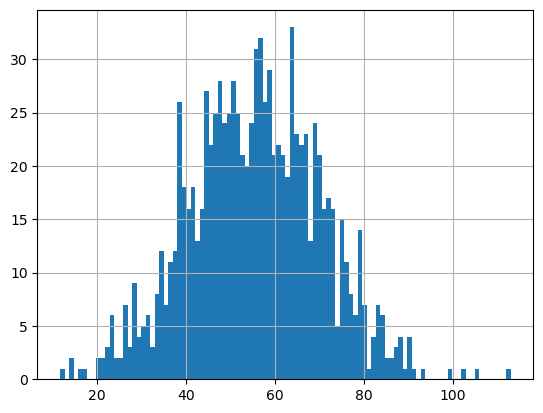

In [200]:
# show the distribution of valuations
import matplotlib.pyplot as plt
df["valuation"].hist(bins=100)
plt.show()

## Outliers com Z-Score

Z-Score: O Z-score mede quantos desvios padrão um ponto de dados está distante da média. Um limiar comum é 3 ou -3. Pontos de dados com um Z-score além desse intervalo são considerados outliers.

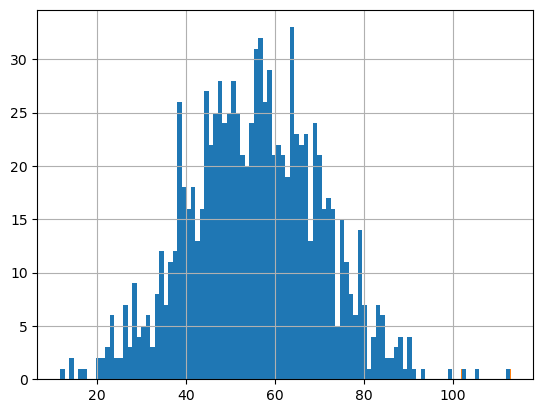

In [201]:
# show the distribution of valuations, with two bars representing outliers detected with z-score
import numpy as np
z = np.abs((df["valuation"] - df["valuation"].mean()) / df["valuation"].std())
df["outlier"] = z > 3
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [202]:
# list the companies with outliers detected with z-score
df[df["outlier"] == True].head()

,name,valuation,outlier
226,pear strawberry,105.244077,True
649,lemon date,101.912282,True
785,banana orange,113.055567,True


### Numero de detecções

In [203]:
df[df["outlier"] == True].shape

(3, 3)

## Outliers com Z-Score (modificado para 2)

Z-Score: O Z-score mede quantos desvios padrão um ponto de dados está distante da média. Um limiar comum é 3 ou -3. Pontos de dados com um Z-score além desse intervalo são considerados outliers.

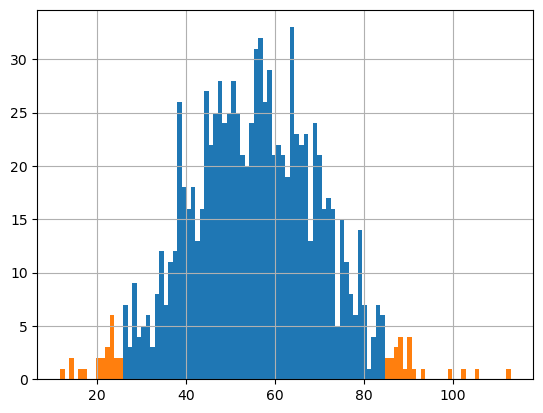

In [204]:
# show the distribution of valuations, with two bars representing outliers detected with z-score of 2
import numpy as np
z = np.abs((df["valuation"] - df["valuation"].mean()) / df["valuation"].std())
df["outlier"] = z > 2
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [205]:
# list the companies with outliers detected with z-score of 2
df[df["outlier"] == True].head()

,name,valuation,outlier
2,fig lemon,22.906216,True
7,banana apple,23.153481,True
10,mango orange,86.479242,True
38,watermelon elderberry,87.327540,True
41,raspberry honeydew,90.772746,True


### Numero de detecções

In [206]:
df[df["outlier"] == True].shape

(44, 3)

## Outliers com IQR

IQR (Intervalo Interquartil): Calcule o primeiro quartil (Q1) e o terceiro quartil (Q3). O IQR é Q3 - Q1. Outliers são tipicamente definidos como valores abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR.

Limite inferior=Q1−1.5×IQR

Limite superior=Q3+1.5×IQR

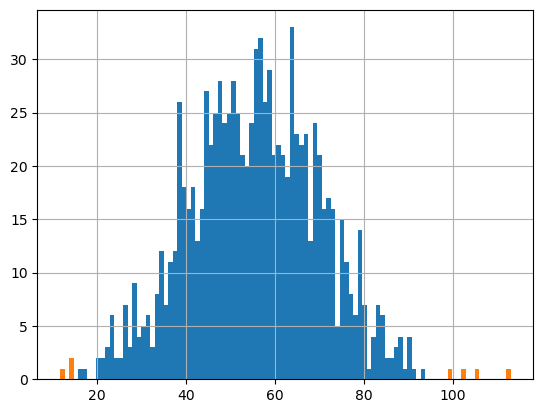

In [207]:
# show the distribution of valuations, with two bars representing outliers detected with iqr
q1 = df["valuation"].quantile(0.25)
q3 = df["valuation"].quantile(0.75)
iqr = q3 - q1
df["outlier"] = (df["valuation"] < q1 - 1.5 * iqr) | (df["valuation"] > q3 + 1.5 * iqr)
df["valuation"].hist(bins=100)
df[df["outlier"] == True]["valuation"].hist(bins=100)
plt.show()

In [208]:
# list the companies with outliers detected with iqr
df[df["outlier"] == True].head()

,name,valuation,outlier
226,pear strawberry,105.244077,True
583,watermelon cherry,14.518361,True
635,grape grape,11.741430,True
649,lemon date,101.912282,True
751,orange orange,99.679780,True


### Numero de detecções

In [209]:
df[df["outlier"] == True].shape

(7, 3)

## Outliers com LOF

Local Outlier Factor (LOF): Mede a densidade de desvio local de um determinado ponto de dados em relação aos seus vizinhos. Quanto menor a densidade de um ponto em comparação com seus vizinhos, mais provável que seja um outlier.

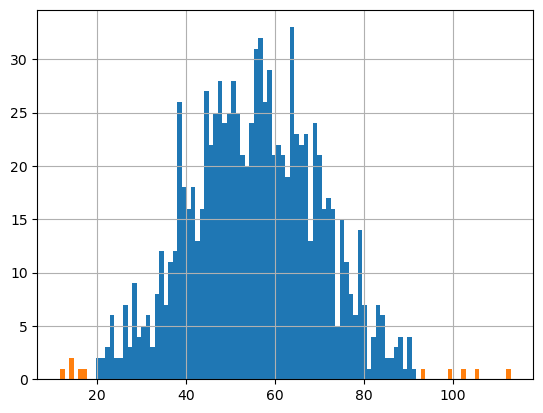

In [210]:
# show the distribution of valuations, with two bars representing outliers detected with lof
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
df["outlier"] = lof.fit_predict(df[["valuation"]])
df["valuation"].hist(bins=100)
df[df["outlier"] == -1]["valuation"].hist(bins=100)
plt.show()

In [211]:
# list the companies with outliers detected with lof
df[df["outlier"] == -1].head()

,name,valuation,outlier
226,pear strawberry,105.244077,-1
547,strawberry cherry,93.082892,-1
583,watermelon cherry,14.518361,-1
635,grape grape,11.741430,-1
649,lemon date,101.912282,-1


### Numero de detecções

In [212]:
df[df["outlier"] == -1].shape

(10, 3)

## Outliers com Isolation Forrest

Isolation Forest: Este algoritmo isola observações selecionando aleatoriamente uma característica e, em seguida, selecionando aleatoriamente um valor de divisão entre os valores máximo e mínimo da característica selecionada.

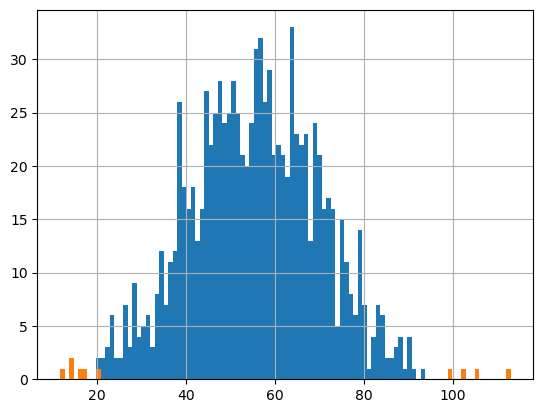

In [213]:
# show the distribution of valuations, with two bars representing outliers detected with isolation forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.01)
df["outlier"] = iforest.fit_predict(df[["valuation"]])
df["valuation"].hist(bins=100)
df[df["outlier"] == -1]["valuation"].hist(bins=100)
plt.show()

In [214]:
# list the companies with outliers detected with isolation forest
df[df["outlier"] == -1].head()

,name,valuation,outlier
226,pear strawberry,105.244077,-1
305,elderberry ugli,20.383357,-1
583,watermelon cherry,14.518361,-1
635,grape grape,11.741430,-1
649,lemon date,101.912282,-1


### Numero de detecções

In [215]:
df[df["outlier"] == -1].shape

(10, 3)